In [35]:
folder = 'F:/E2E-CARLA-ReinforcementLearning-PPO/logs/1709224739-working-90kmh/evaluation/'

In [36]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
# folder = 'F:/CollisionAvoidance-Carla-DRL-MPC/logs/1709461045-recurrentPPO-90kmh-transfer/evaluation/70km_best_model/'
with open(folder + 'logger.csv', 'r') as file:
    lines = file.readlines()
processed_data = []
for line in lines:
    # Remove quotes and newline characters
    clean_line = line.strip().strip('"')
    records = clean_line.split('","')
    processed_data.append(records)

# # Create DataFrame
# df = pd.DataFrame(processed_data)
# Convert each string to a list
lk = []
for x in processed_data[2:]:
    data_lists = [ast.literal_eval(item) for item in x]
    lk.append(data_lists)
# Create a DataFrame
df = pd.DataFrame()
for k in range(len(lk)):
    df = pd.concat([df, pd.DataFrame(lk[k])])

In [39]:
df.columns = ['Episode', 'des_speed', 'last_v', 'ttc', 'distance_parked', 'timestep', 'X', 'Y', 'Speed', 'Acceleration','acceleration x', 'acceleration y', 'sideslip', 'Yaw', 'Steer']
cols_list = df.columns[1:].tolist()

df2 = df[df['last_v']>0]
episode_data = df2[df2['Episode'] == 6]


episode_data = episode_data[episode_data['Y']>episode_data['Y'].max()-40]
episode_data = episode_data.reset_index()

# episode_data['X'] = episode_data['X'].apply(lambda x: x -episode_data['X'][0])
# episode_data['Y'] = episode_data['Y'].apply(lambda x: x -episode_data['Y'][0])

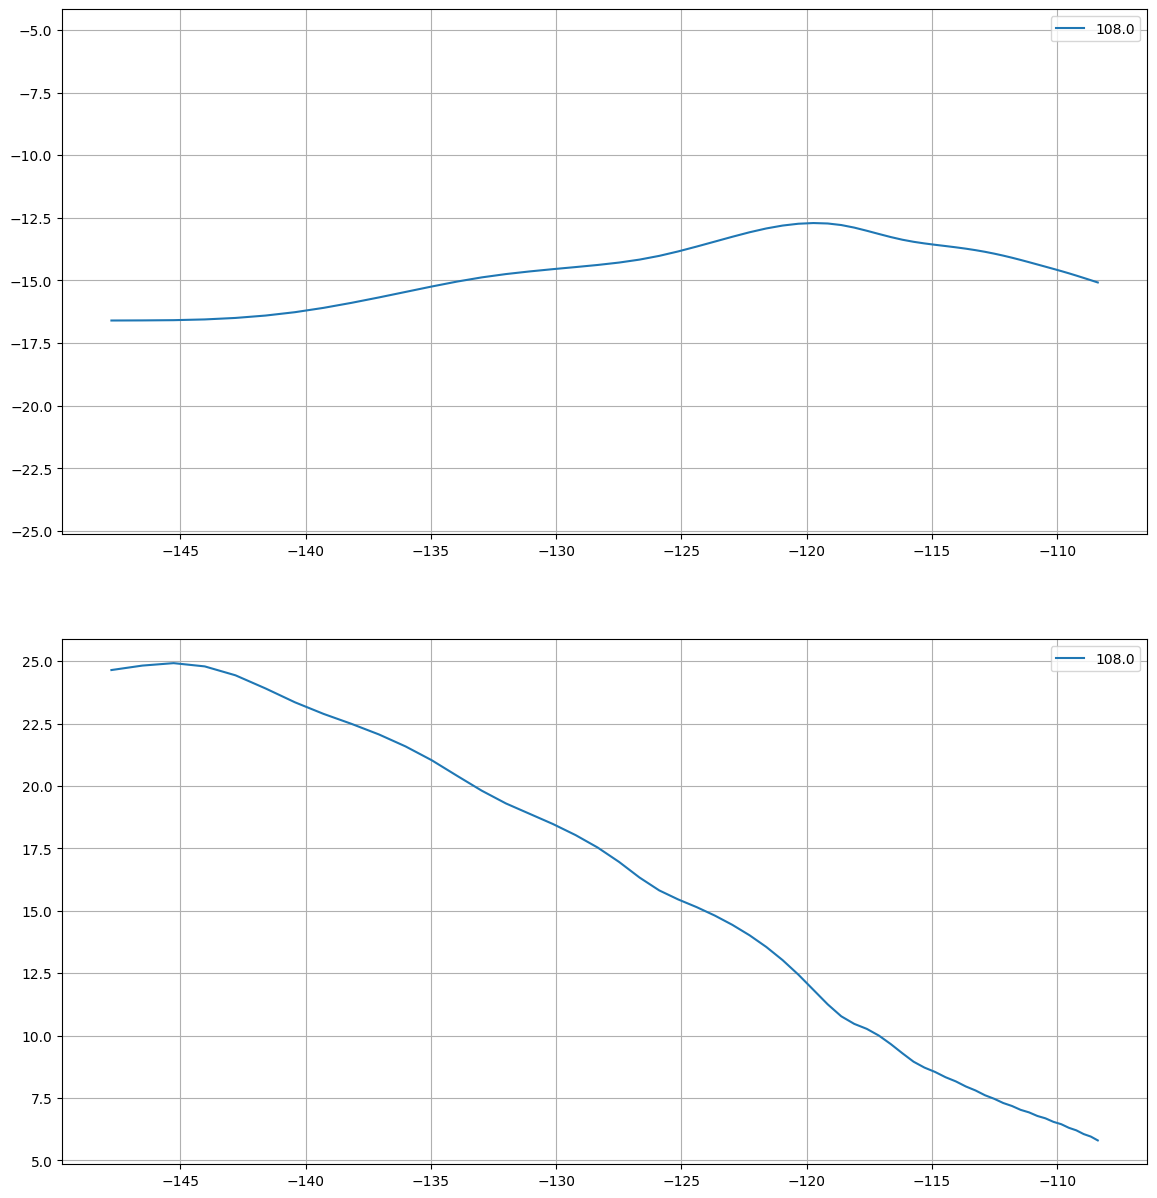

In [40]:
fig , axes = plt.subplots(2,1,figsize=(14,15))

for vec in episode_data['des_speed'].unique():

    df_plot = episode_data[episode_data['des_speed'] == vec]

    axes[0].plot(df_plot['Y'], df_plot['X'],  label=vec*3.6)
    axes[0].grid(True)
    axes[0].axis("equal")
    # axes[0].xlabel("x")
    # axes[0].ylabel("y")
    # axes[0].set(ylim=(-4.5,4.5))
    # axes[0].set(xlim=(-170,-120))
    axes[0].legend()


    axes[1].plot(df_plot['Y'], df_plot['Speed'],  label=vec*3.6)
    axes[1].grid(True)
    # axes[0].axis("equal")
    # axes[0].xlabel("x")
    # # axes[0].ylabel("y")
    # axes[1].set(ylim=(-0.25,0.4))
    # axes[1].set(xlim=(-170,-120))
    axes[1].legend()

In [41]:
episode_data.to_csv(folder+'90kmh-e2e.csv')

In [29]:
df2[df2['Episode'] == 11]

,Episode,des_speed,last_v,ttc,distance_parked,timestep,X,Y,Speed,Acceleration,acceleration x,acceleration y,sideslip,Yaw,Steer
0,11,20.0,19.010171,1.0,100,50,-16.893253,-223.485184,3.919999,9.799986,0.000000,0.000000,0.000000,1.589615,0.107776
1,11,20.0,19.010171,1.0,100,187,-16.893253,-223.485184,3.087946,16.641060,-0.000046,-0.000002,-0.000023,1.589615,0.107776
2,11,20.0,19.010171,1.0,100,202,-16.893253,-223.485184,1.232201,37.114883,0.000035,0.000002,-0.000005,1.589615,0.107776
3,11,20.0,19.010171,1.0,100,192,-16.892632,-223.484650,0.203033,28.671031,0.562313,-0.021278,0.276764,1.589610,0.107776
4,11,20.0,19.010171,1.0,100,346,-16.892561,-223.484451,0.256634,1.216709,-0.496126,0.020341,0.033092,1.589605,0.107776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,11,20.0,19.010252,1.0,100,76,-15.426810,-109.952309,9.511643,6.074936,-4.281806,-4.309406,-0.043971,1.603493,0.075927
202,11,20.0,19.010252,1.0,100,71,-15.453548,-109.483849,9.301064,6.275416,-4.405964,-4.468594,-0.068429,1.609103,0.116772
203,11,20.0,19.010252,1.0,100,73,-15.486195,-109.026085,9.102296,4.901191,-2.552800,-4.183884,-0.083823,1.620414,0.103707
204,11,20.0,19.010252,1.0,100,72,-15.520450,-108.578110,8.910429,3.842112,0.136046,-3.839703,-0.084855,1.632070,0.053789


In [31]:
pts_list = []

for ep in df2['Episode'].unique():
    pts = df2[df2['Episode'] == ep]
    if len(pts) > 200:
        for i in pts.index:
            pts_list.append([ep, pts['X'][i], pts['Y'][i]])


In [17]:
import argparse
argparser = argparse.ArgumentParser(
    description='CARLA Manual Control Client')
argparser.add_argument(
    '-v', '--verbose',
    action='store_true',
    dest='debug',
    help='print debug information')
argparser.add_argument(
    '--host',
    metavar='H',
    default='127.0.0.1',
    help='IP of the host server (default: 127.0.0.1)')
argparser.add_argument(
    '-p', '--port',
    metavar='P',
    default=2000,
    type=int,
    help='TCP port to listen to (default: 2000)')
argparser.add_argument(
    '-a', '--autopilot',
    action='store_true',
    help='enable autopilot')
argparser.add_argument(
    '--res',
    metavar='WIDTHxHEIGHT',
    default='1280x720',
    help='window resolution (default: 1280x720)')
argparser.add_argument(
    '--filter',
    metavar='PATTERN',
    default='vehicle.*',
    help='actor filter (default: "vehicle.*")')
argparser.add_argument(
    '--rolename',
    metavar='NAME',
    default='hero',
    help='actor role name (default: "hero")')
argparser.add_argument(
    '--gamma',
    default=2.2,
    type=float,
    help='Gamma correction of the camera (default: 2.2)')
argparser.add_argument(
    '--map',
    metavar='NAME',
    default='Town04',
    help='simulation map (default: "Town04")')
argparser.add_argument(
    '--spawn_x',
    metavar='x',
    default='-16.75', #town04 = -16.75
    help='x position to spawn the agent')
argparser.add_argument(
    '--spawn_y',
    metavar='y',
    default='-223.55', #town04 = -223.55
    help='y position to spawn the agent')
argparser.add_argument(
    '--random_spawn',        
    metavar='RS',
    default='0',
    type=int,
    help='Random spawn agent')
argparser.add_argument(
    '--vehicle_id',
    metavar='NAME',
    # default='vehicle.jeep.wrangler_rubicon',
    default='vehicle.tesla.model3',
    help='vehicle to spawn, available options : vehicle.audi.a2 vehicle.audi.tt vehicle.carlamotors.carlacola vehicle.citroen.c3 vehicle.dodge_charger.police vehicle.jeep.wrangler_rubicon vehicle.yamaha.yzf vehicle.nissan.patrol vehicle.gazelle.omafiets vehicle.bh.crossbike vehicle.ford.mustang vehicle.bmw.isetta vehicle.audi.etron vehicle.harley-davidson.low rider vehicle.mercedes-benz.coupe vehicle.bmw.grandtourer vehicle.toyota.prius vehicle.diamondback.century vehicle.tesla.model3 vehicle.seat.leon vehicle.lincoln.mkz2017 vehicle.kawasaki.ninja vehicle.volkswagen.t2 vehicle.nissan.micra vehicle.chevrolet.impala vehicle.mini.cooperst')
argparser.add_argument(
    '--vehicle_wheelbase',
    metavar='NAME',
    type=float,
    default='2.89',
    help='vehicle wheelbase used for model predict control')
argparser.add_argument(
    '--waypoint_resolution',
    metavar='WR',
    default='1',
    type=float,
    help='waypoint resulution for control')
argparser.add_argument(
    '--waypoint_lookahead_distance',
    metavar='WLD',
    default='5.0',
    type=float,
    help='waypoint look ahead distance for control')
argparser.add_argument(
    '--desired_speed',
    metavar='SPEED',
    default='15',
    type=float,
    help='desired speed for highway driving')
argparser.add_argument(
    '--control_mode',
    metavar='CONT',
    default='PID',
    help='Controller')
argparser.add_argument(
    '--planning_horizon',
    metavar='HORIZON',
    type=int,
    default='5',
    help='Planning horizon for MPC')
argparser.add_argument(
    '--time_step',
    metavar='DT',
    default='0.15',
    type=float,
    help='Planning time step for MPC')
argparser.add_argument(
    '--FPS',
    metavar='FPS',
    default='20',
    type=int,
    help='Frame per second for simulation')

args = argparser.parse_args()

args.width, args.height = [int(x) for x in args.res.split('x')]


In [32]:
import carla
import time
from Utils.utils import *
from Utils.HUD import HUD as HUD
from World import World

client = carla.Client(args.host, args.port)
client.set_timeout(100.0)
hud = HUD()
carla_world = client.load_world(args.map)
# carla_world = client.reload_world()
carla_world = client.get_world()
world = World(client, carla_world, hud, args)

In [33]:
world.create_actors()

vehicle spawned


In [11]:
world.destroy()

In [34]:
for w in range(2,11):
    ls = [x for x in pts_list if x[0] == w]
    for i in range(len(ls)-1):

        z= ls[i]
        spawn_location_r = carla.Location()
        spawn_location_r.x = float(z[1])
        spawn_location_r.y = float(z[2])
        spawn_location_r.z = 1.0

        zf= ls[i+1]
        spawn_location_f = carla.Location()
        spawn_location_f.x = float(zf[1])
        spawn_location_f.y = float(zf[2])
        spawn_location_f.z = 1.0


        carla_world.debug.draw_line(spawn_location_r, spawn_location_f, thickness=0.1, color=carla.Color(r=255, g=0, b=0), life_time=-1.0, persistent_lines=True)